In [386]:
import uproot # for reading ROOT files, in this notebook it won't be used but it is still very useful for many analyses
import numpy as np
import importlib
import basicfunc as bf

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\libreria\\basicfunc.py'>

# 'normal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [-0.990174518711856, 0.9351889460152412] = 349 ± 18


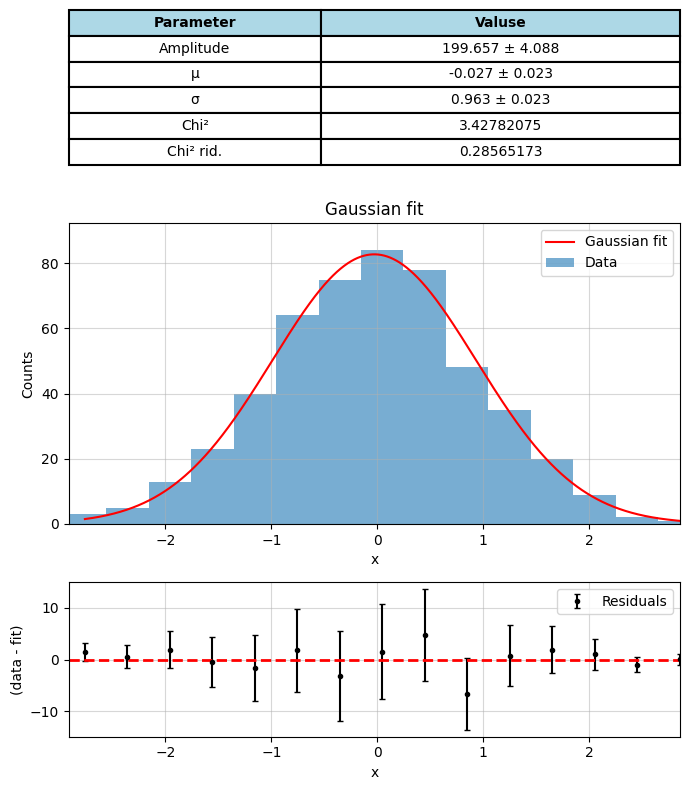

In [387]:
# Data generation 
data = np.random.normal(loc=0, scale=1, size=500)

# Test of the normal fit function
ex_normal = bf.normal(data=data, xlabel="x", ylabel="Counts", titolo="Gaussian fit", n=1, plot=True)


# 'compton' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integral within [451.35226930623327, 552.8274281495642] = 2050 ± 45


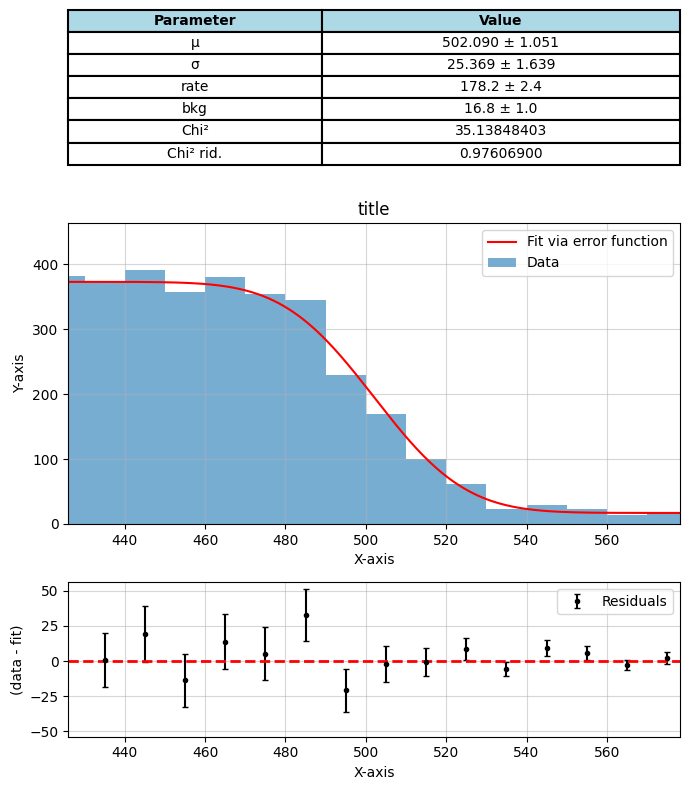

In [388]:
# Edge parameters
mu = 500
sigma = 20
rate = 1000
bkg = 50
x = np.linspace(0, 1000, 2000)
# Data generation with the erfc function
y_clean = rate * (1 - 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))) + bkg
# Data generation with some noise
probability_distribution = y_clean / np.sum(y_clean)
prova = np.random.choice(x, size=20000, p=probability_distribution)

# Test of the compton fit function
ex_compton = bf.compton(data=prova, b=100, xmin=300, xmax=700, n=2, plot=True)

# 'linear' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
m = 2.363597318968566 ± 0.012234271938789192
q = 1.5549161683111954 ± 0.07124092023887388
Chi-squared = 2249.9775501848026
Reduced chi-squared = 80.35634107802866


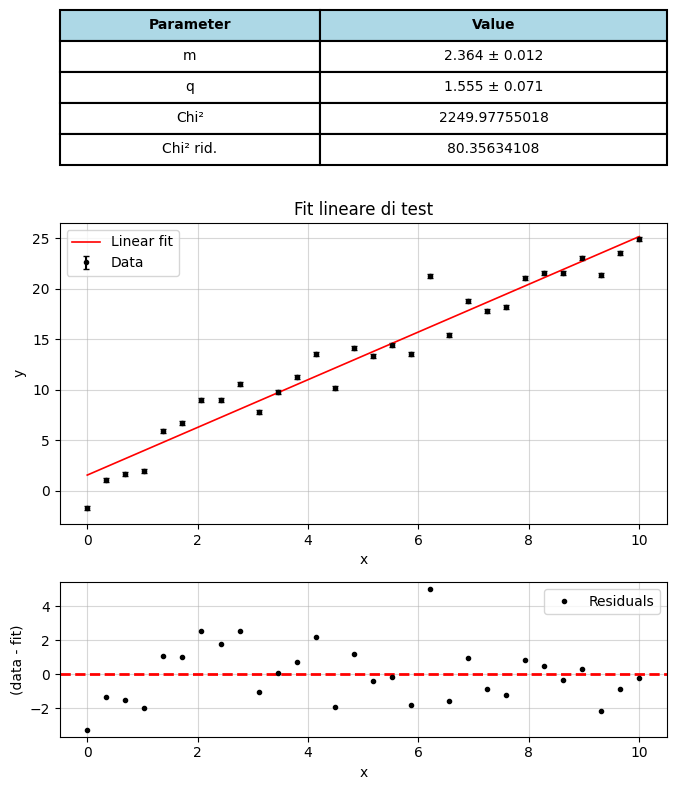

In [389]:
# Parameters
m_true = 2.5
q_true = 1.0

# Data generation with high noise level
x = np.linspace(0, 10, 30)
y_clean = m_true * x + q_true
rumore = np.random.normal(0, 2.0, size=x.size)
y = y_clean + rumore
# Errori fittizi (sy) per simulare incertezza nella misura
sy = np.full_like(x, 0.2) # constant y error
sx = np.zeros_like(x)     # no x error

# Test of the linear fit function
ex_linear = bf.linear(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit lineare di test", plot=True)

# 'exponential' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 1.9781988597930735 ± 1.14684782227601
tau = 932.0520633906599 ± 1505.7232901531677
f0 = 0.00901793095945997 ± 1.0695749784240103
Chi-squared = 0.0008834851009368481
Reduced Chi-squared = 0.00017669702018736962


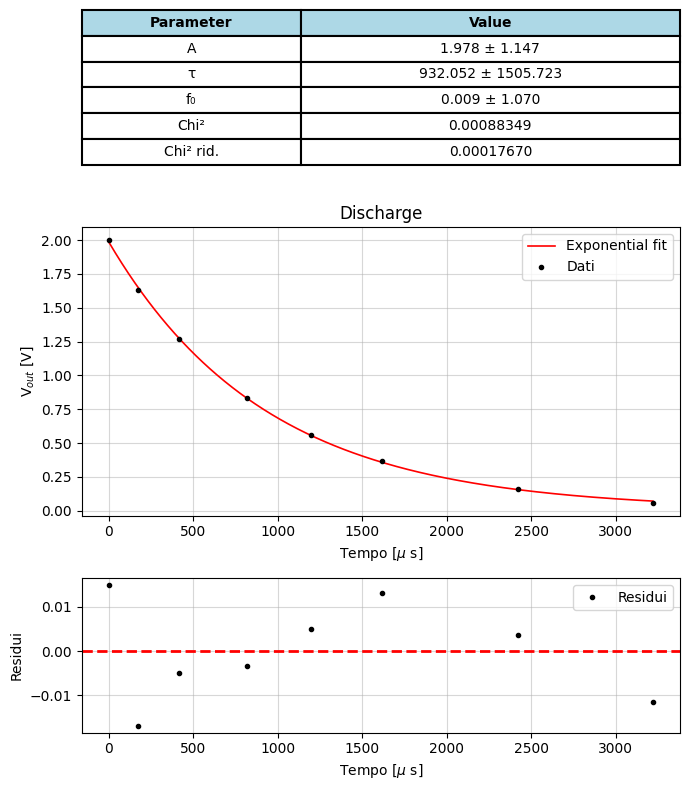

In [390]:
# Fake data of a discharge curve
x = np.array([1, 176, 416, 816, 1200, 1620, 2420, 3220]) #microseconds
y = np.array([2.00, 1.63, 1.27, 0.83, 0.56, 0.37, 0.16, 0.06]) #volt

#Test of the exponential fit function
caduta_Rsimulazione = bf.exponential(x, y, xlabel=r'Tempo [$\mu$ s]', ylabel=r'V$_{out}$ [V]', titolo=r'Discharge', plot=True)

# 'lorentzian' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 8.196854383338414 ± 0.14512093599150203
gamma = 2.366021189964484 ± 0.06101011549747323
x0 = 4.0100950767684145 ± 0.0208088117020782
Chi-squared = 188.05357834573385
Reduced Chi-squared = 6.964947346138291


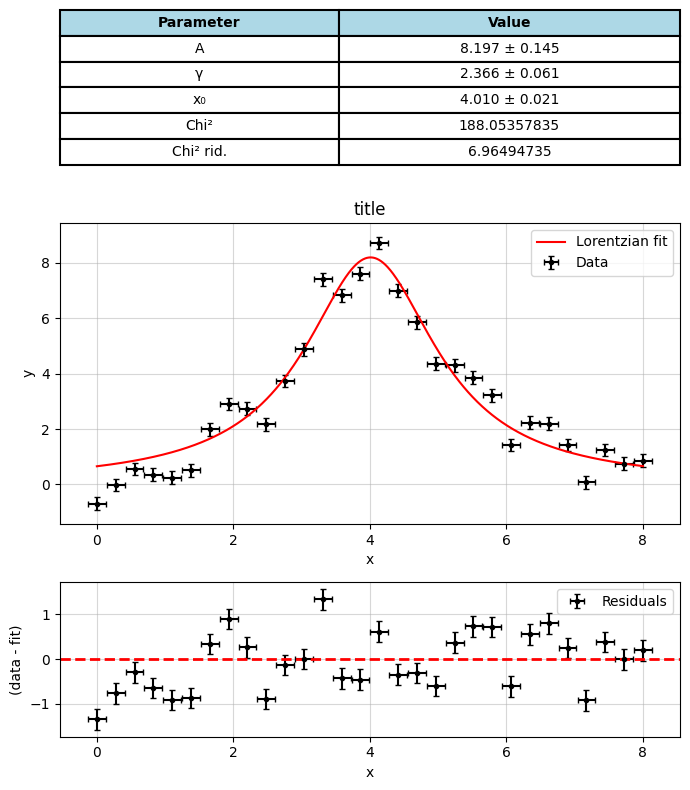

In [391]:
# Lorentzian function (equivalente a Breit-Wigner con a/π e FWHM)
def lorentz(x, A, gamma, x0):
    return A * (gamma**2) / ((x - x0)**2 + gamma**2)

# Parametri reali (per generare dati fittizi)
A_true = 8
gamma_true = 1.2
x0_true = 4.0

# Generazione dati
x = np.linspace(0, 8, 30)
y_clean = lorentz(x, A_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.7, size=x.shape)
y = y_clean + noise

# Errori simulati
sy = np.full_like(y, 0.23)
sx = np.full_like(x, 0.13)

# Test of the Lorentzian fit function
ex_lorentz = bf.lorentzian(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", plot=True)

# 'wigner' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
a = 41.605847090189016 ± 0.399242130783544
gamma = 16.323866846377484 ± 0.22231612116567157
x0 = 24.746622017303736 ± 0.07503126566723123
Chi-squared = 282.92361111862596
Reduced Chi-squared = 10.478652263652814


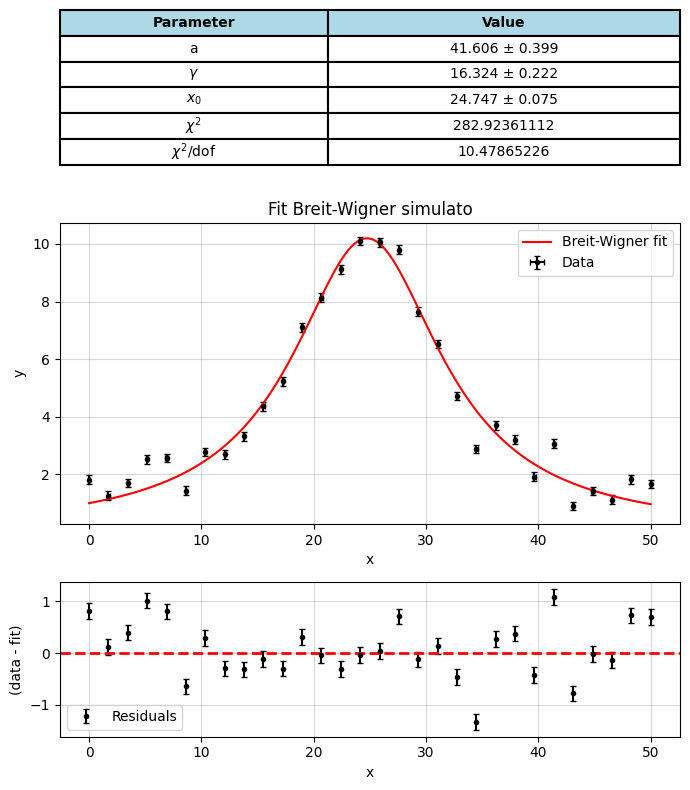

In [392]:
# Breit-Wigner definitio for the generation of the fake data
def wigner(x, a, gamma, x0):
    return a * gamma**2 / ((x - x0)**2 + gamma**2)

# Real parameters (to generate synthetic data)
a_true = 10
gamma_true = 8
x0_true = 25.0

# Data generation with noise
np.random.seed(0)
x = np.linspace(0, 50, 30)
y_clean = wigner(x, a_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.5, size=x.shape)
y = y_clean + noise

# Simulated errors
sy = np.full_like(y, 0.15)
sx = np.full_like(x, 0.1)

# Test of the Breit-Wigner fit function
prova_breit = bf.breitwigner(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit Breit-Wigner simulato", plot=True)

# 'lognormal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Optimised parameters
-----------------------------------------------
Amplitude = 194.06366135374188 ± 7.424658372028954
Mean = 1.1991789001102249 ± 0.026841787057193655
Sigma = 0.6043344730486312 ± 0.028335010901200466
Chi-squared = 24.193295270375522
Reduced chi-squared = 0.7560404771992351
Integral within 1σ: 665 ± 25


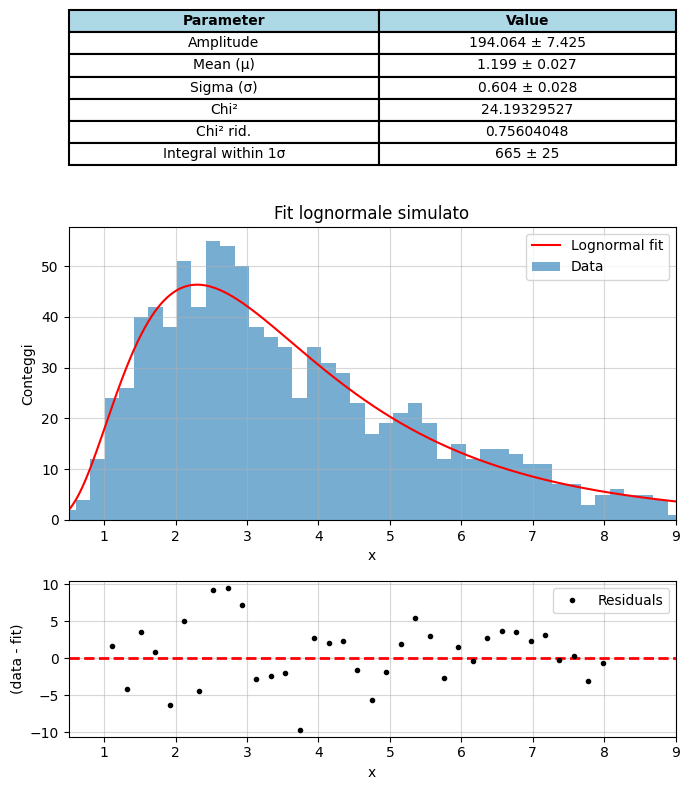

In [393]:
from scipy.stats import lognorm

# Beginning lognormal distribution parameters
s = 0.6                    
mu = 1.2                   
scale = np.exp(mu)         
ampiezza = 1000            
n_bins = 50                

# Bin Generation
x = np.linspace(0.1, 10, n_bins)
bin_width = x[1] - x[0]

# Theoretical lognormal distribution
y_teorica = ampiezza * lognorm.pdf(x, s=s, scale=scale) * bin_width

# Noise addition
y_rumorosa = np.random.poisson(y_teorica)

# Test of the lognormal fit function
ex_lognormal = bf.lognormal(bin_centers=x, counts=y_rumorosa, xlabel="x", ylabel="Conteggi", titolo="Fit lognormale simulato", xmin=1, xmax=8, x1=0.5, x2=9, n=1, plot=True)

# 'bode' function


Optimised parameters
--------------------------------------------------
Cutoff frequency (f_cut) = 74869168.251 ± 9257375844856.195
Chi-squared = 93.8508
Reduced chi-squared = 3.2362


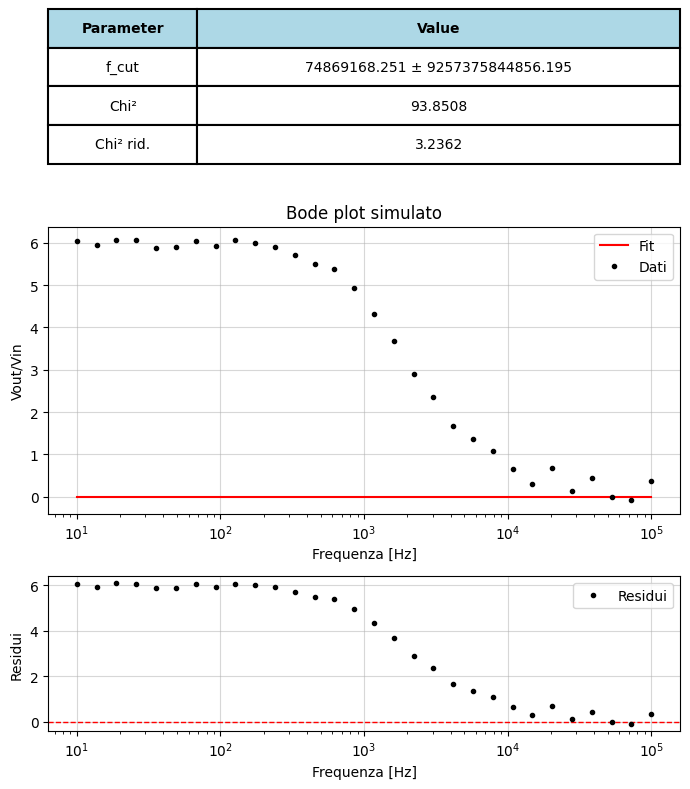

In [395]:
f_low = np.logspace(1, 5, 30)
f_cut_low = 1000  # Frequenza di taglio a 1 kHz

# ideal gain
gain_low = 1 / np.sqrt(1 + (f_low / f_cut_low) ** 2)

# constant input voltage
vin_low = np.ones(30)

# output voltage with noise
noise_low = np.random.normal(1, 0.02, size=f_low.shape)
vout_low = vin_low * gain_low + noise_low

ex_bode_low = bf.bode(f_low, out_=vout_low, in_=vin_low, tipo="low", xlabel="Frequenza [Hz]", ylabel="Vout/Vin", titolo="Bode plot simulato", plot=True)